In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math as m
import pandas as pd
import os
import json
import skimage.segmentation as sg
import cv2

In [2]:
def getXYofboundary(im):

    bnd = sg.find_boundaries(im, mode='inner').astype(np.uint8)
    
    return getXY(bnd)

def getXY(bnd):
    return np.transpose(np.nonzero(bnd))

In [29]:
def getProcNumbers(organ,cont_name,directions,numbers_dict,organ_index):
    with open('../dataset/goldMulty/projections/CT_18361990298_Image_57.json') as f:
        gold_dict = json.load(f) 
    
    contour = []
    if cont_name == 'gold':
        label = cv2.imread('../dataset/goldMulty/CT_18361990298_Image_57.png',cv2.IMREAD_GRAYSCALE)
        im = np.where(label[130:386, 66:450]==organ_index,1,0)
        xy = getXYofboundary(im)
        for i in range(len(xy)):
            r=[]
            r.append(int(xy[i,1]))
            r.append(int(256-xy[i,0]))
            contour.append(r)          
    else:
        with open('CT_18361990298_Image_57/'+organ+'/'+cont_name+'.csv') as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                r=[]
                r.append(int(row[0]))
                r.append(int(row[1]))
                contour.append(r)                
    cont = np.array(contour)   
    fig, ax = plt.subplots()
    plt.scatter(cont[:,0],cont[:,1], s=1, c='black')
    if cont_name == 'gold':
        title = organ+'-'+cont_name
    else:
        title = organ+'-'+'epoch_'+cont_name
    plt.title(title)
    plt.xlim(-100,  450)

    for i in range(len(directions)):
        if cont_name == 'gold':
            lengths=np.array(gold_dict[organ+'-'+str(i)])
        else:    
            lengths=np.round(np.dot(cont,directions[i]))     
        ax.scatter(lengths*directions[i][0],lengths*directions[i][1], s=2, label=i*15)
        ax.legend(loc="upper right",markerscale=6,title="Degrees")
        numbers_dict[organ+'-'+cont_name+'-'+str(i)] = lengths

In [15]:
directions = [[round(m.cos(m.radians(angle)),2),round(m.sin(m.radians(angle)),2)] for angle in [0,15,30,45,60,75,90,105,120,135,150,165]]

<Figure size 432x288 with 0 Axes>

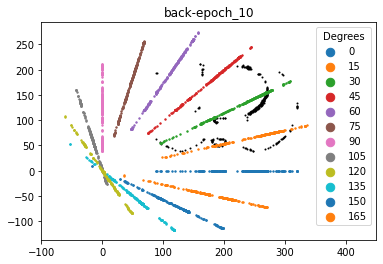

<Figure size 432x288 with 0 Axes>

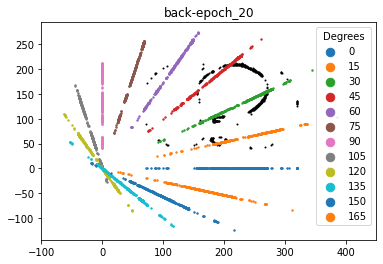

<Figure size 432x288 with 0 Axes>

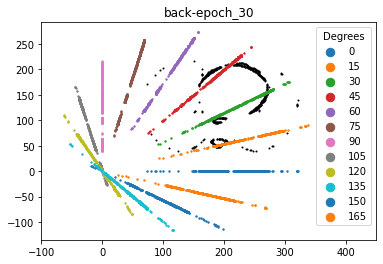

<Figure size 432x288 with 0 Axes>

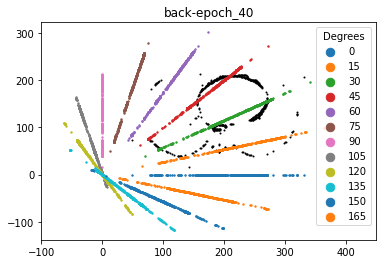

<Figure size 432x288 with 0 Axes>

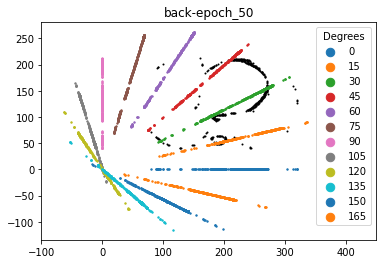

<Figure size 432x288 with 0 Axes>

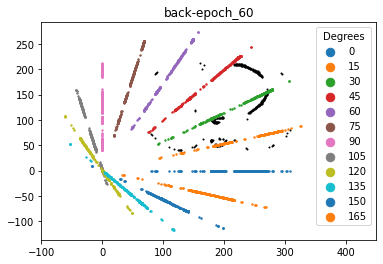

<Figure size 432x288 with 0 Axes>

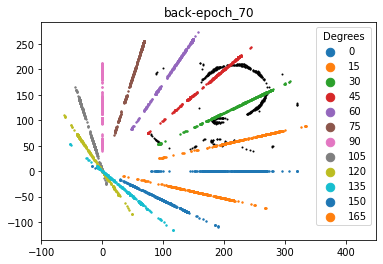

<Figure size 432x288 with 0 Axes>

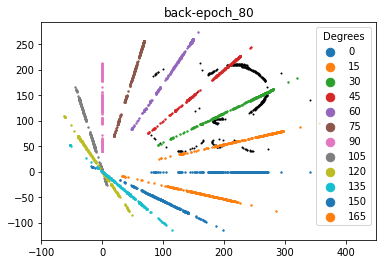

<Figure size 432x288 with 0 Axes>

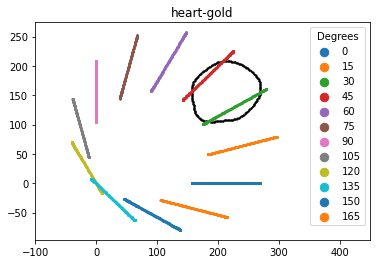

<Figure size 432x288 with 0 Axes>

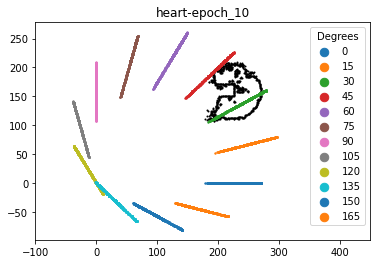

<Figure size 432x288 with 0 Axes>

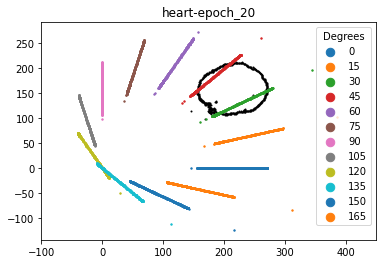

<Figure size 432x288 with 0 Axes>

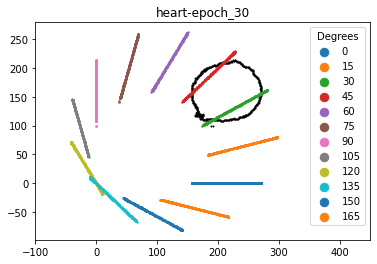

<Figure size 432x288 with 0 Axes>

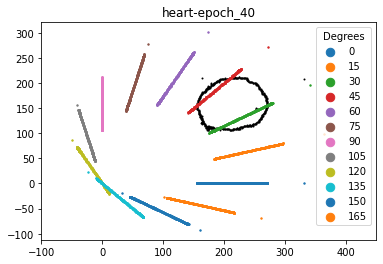

<Figure size 432x288 with 0 Axes>

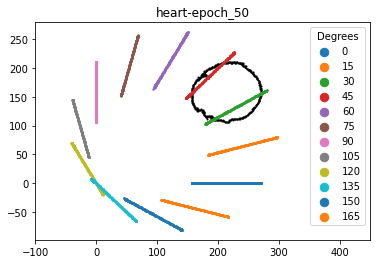

<Figure size 432x288 with 0 Axes>

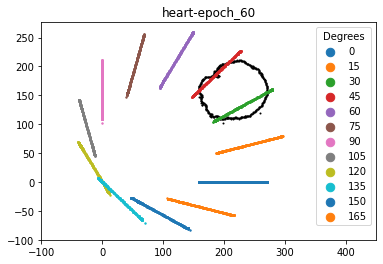

<Figure size 432x288 with 0 Axes>

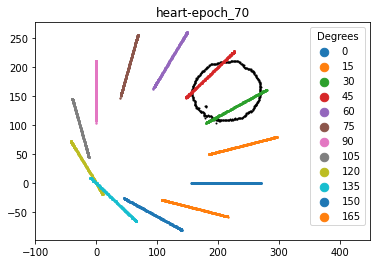

<Figure size 432x288 with 0 Axes>

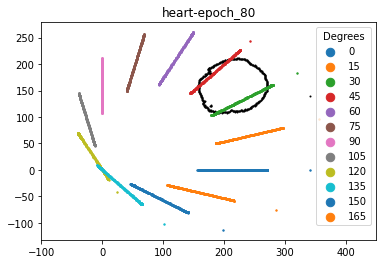

<Figure size 432x288 with 0 Axes>

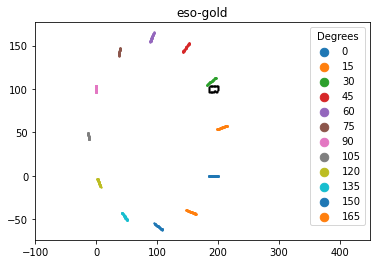

<Figure size 432x288 with 0 Axes>

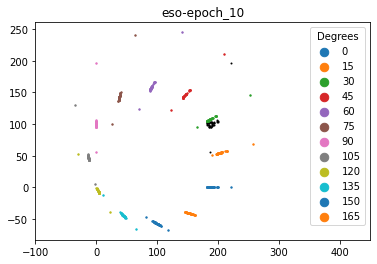

<Figure size 432x288 with 0 Axes>

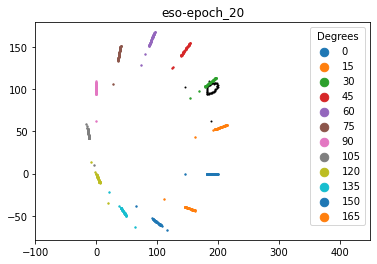

<Figure size 432x288 with 0 Axes>

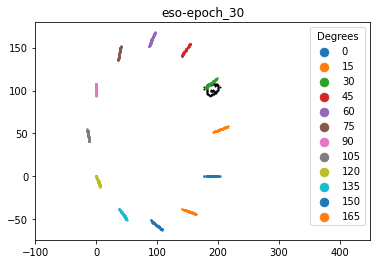

<Figure size 432x288 with 0 Axes>

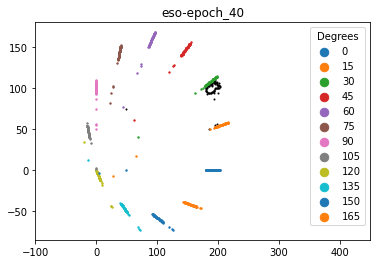

<Figure size 432x288 with 0 Axes>

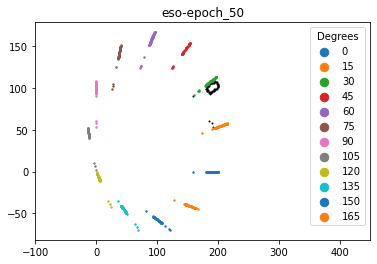

<Figure size 432x288 with 0 Axes>

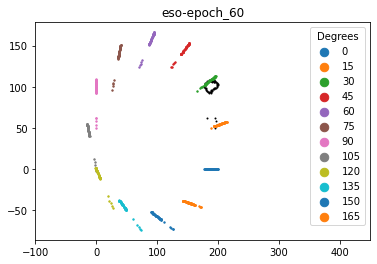

<Figure size 432x288 with 0 Axes>

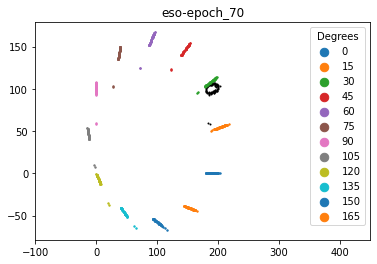

<Figure size 432x288 with 0 Axes>

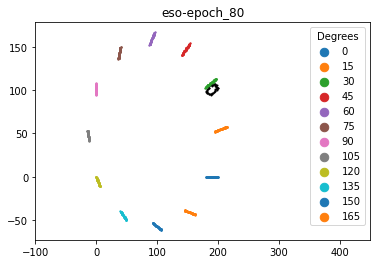

<Figure size 432x288 with 0 Axes>

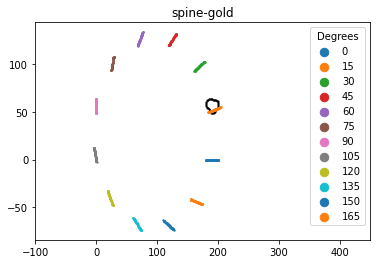

<Figure size 432x288 with 0 Axes>

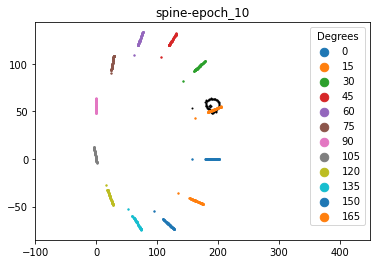

<Figure size 432x288 with 0 Axes>

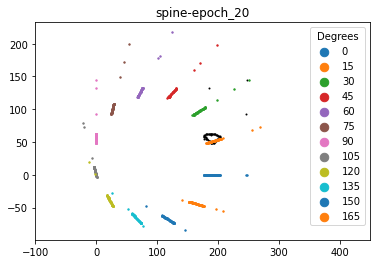

<Figure size 432x288 with 0 Axes>

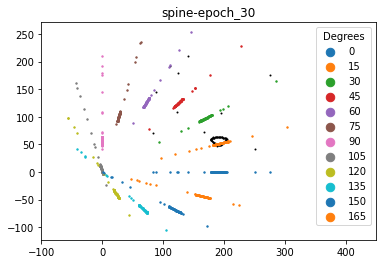

<Figure size 432x288 with 0 Axes>

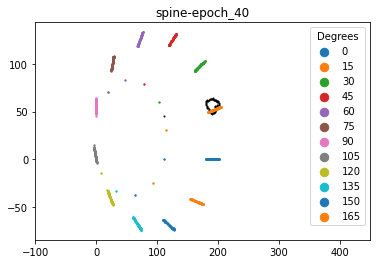

<Figure size 432x288 with 0 Axes>

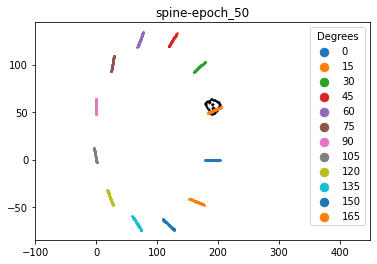

<Figure size 432x288 with 0 Axes>

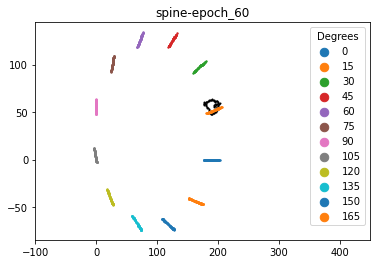

<Figure size 432x288 with 0 Axes>

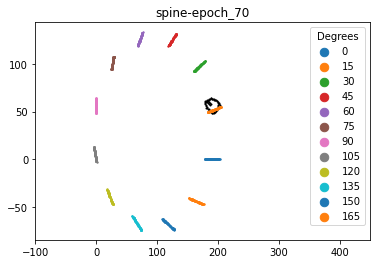

<Figure size 432x288 with 0 Axes>

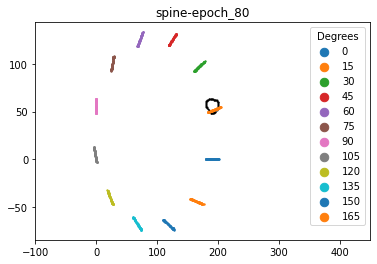

<Figure size 432x288 with 0 Axes>

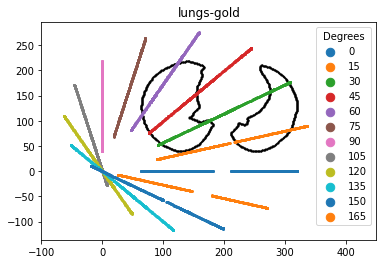

<Figure size 432x288 with 0 Axes>

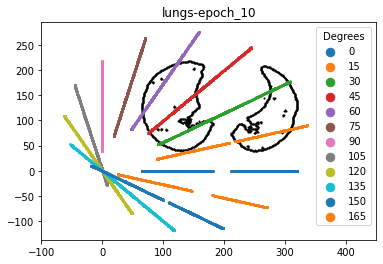

<Figure size 432x288 with 0 Axes>

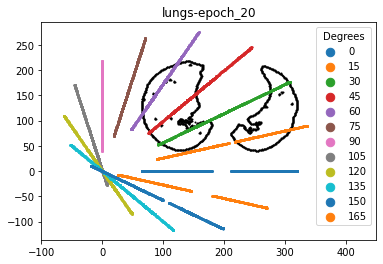

<Figure size 432x288 with 0 Axes>

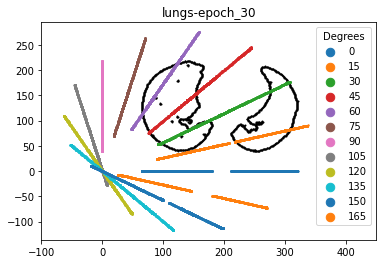

<Figure size 432x288 with 0 Axes>

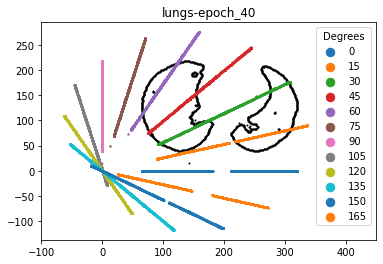

<Figure size 432x288 with 0 Axes>

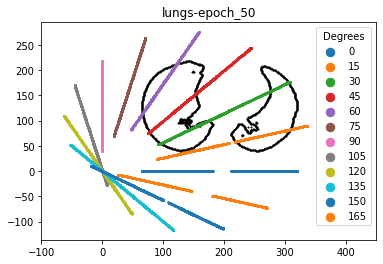

<Figure size 432x288 with 0 Axes>

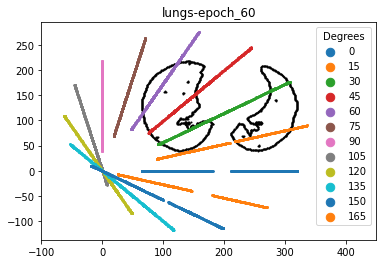

<Figure size 432x288 with 0 Axes>

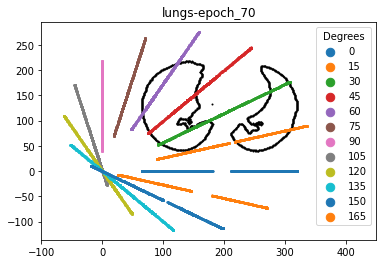

<Figure size 432x288 with 0 Axes>

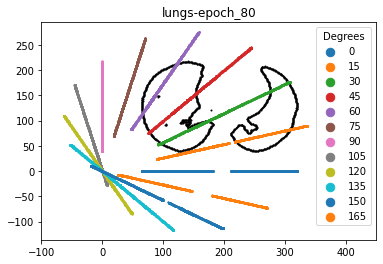

In [30]:
plt.rcParams.update({'figure.max_open_warning': 0})
numbers_dict = {}
organs = ['back','heart','eso','spine','lungs']
cont_names = ['gold','10','20','30','40','50','60','70','80']
for organ in organs:
    for cont_name in cont_names:
        if cont_name != 'gold' or organs.index(organ) != 0:
            plt.figure()
            getProcNumbers(organ,cont_name,directions,numbers_dict,organs.index(organ))

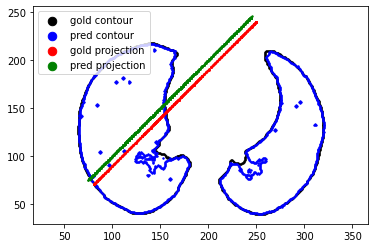

In [71]:
fig, ax = plt.subplots()

contour = []
label = cv2.imread('../dataset/goldMulty/CT_18361990298_Image_57.png',cv2.IMREAD_GRAYSCALE)
im = np.where(label[130:386, 66:450]==4,1,0)
xy = getXYofboundary(im)
for i in range(len(xy)):
    r=[]
    r.append(int(xy[i,1]))
    r.append(int(256-xy[i,0]))
    contour.append(r)   
cont = np.array(contour)   
plt.scatter(cont[:,0],cont[:,1], s=2, c='black',label='gold contour')
plt.axis('equal')
    
contour = []
with open('CT_18361990298_Image_57/lungs/20.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        r=[]
        r.append(int(row[0]))
        r.append(int(row[1]))
        contour.append(r)
cont = np.array(contour)   
plt.scatter(cont[:,0],cont[:,1], s=2, c='b',label='pred contour')
plt.axis('equal')

lengths1 = numbers_dict['lungs-gold-3']
ax.scatter(lengths1*directions[3][0]+5,lengths1*directions[3][1]-5, s=2, c='r',label='gold projection')
lengths2 = numbers_dict['lungs-20-3']
ax.scatter(lengths2*directions[3][0],lengths2*directions[3][1], s=2, c='g', label='pred projection')

ax.legend(loc="upper left",markerscale=6)

In [9]:
np.setdiff1d(numbers_dict['eso-80-1'],numbers_dict['eso-gold-1']).shape[0]

8

In [53]:
diff_dict = {}
organs = ['heart','lungs','eso','spine']
epochs = ['10','20','30','40','50','60','70','80']
for organ in organs:
    for epoch in epochs:
        lst = []
        for i in range(12):
            lst.append(np.setdiff1d(numbers_dict[organ+'-'+epoch+'-'+str(i)],numbers_dict[organ+'-gold-'+str(i)]).shape[0])
        lst.append(round(np.array(lst).mean()))
        diff_dict[organ+'-'+epoch] = lst

In [54]:
df = pd.DataFrame(data=diff_dict)

In [55]:
dfT = df.T

In [56]:
dfT

,0,1,2,3,4,5,6,7,8,9,10,11,12
heart-10,1,0,0,7,6,3,1,0,4,5,5,2,3
heart-20,4,2,4,10,8,6,5,1,5,7,7,2,5
heart-30,1,1,2,10,7,8,6,1,6,8,6,1,5
heart-40,3,1,2,10,9,6,3,3,9,10,8,3,6
heart-50,1,1,1,6,7,5,2,0,5,4,4,1,3
heart-60,1,0,0,7,4,4,4,0,4,4,5,1,3
heart-70,2,0,1,7,5,4,4,1,7,6,5,1,4
heart-80,3,1,2,7,5,4,3,0,3,6,5,2,3
lungs-10,1,0,6,5,0,0,0,0,0,7,2,0,2
lungs-20,1,0,5,6,0,0,0,0,1,6,2,0,2


In [1]:
import skimage.segmentation as sg
import os
import json
import cv2
import math as m
import numpy as np

In [2]:
def getXYofboundary(im):

    bnd = sg.find_boundaries(im, mode='inner').astype(np.uint8)
    
    return getXY(bnd)

def getXY(bnd):
    return np.transpose(np.nonzero(bnd))

In [3]:
directions = [[round(m.cos(m.radians(angle)),2),round(m.sin(m.radians(angle)),2)] for angle in [0,15,30,45,60,75,90,105,120,135,150,165]]

In [4]:
def getProcPoints(organ, direction):
    xy = getXYofboundary(organ)
    x_axis = xy[:,1]
    y_axis = 256-xy[:,0]

    contour = []
    for i in range(len(xy)):
        row = []
        row.append(x_axis[i])
        row.append(y_axis[i])
        contour.append(row)
        
    cont = np.array(contour) 

    lengths=np.round(np.dot(cont,direction))
    
    return lengths.tolist()

In [17]:
def colored_image(goldImage):
    (h,w) = goldImage.shape
    colored_image = np.zeros((h,w,3)).astype(np.uint8)
    for i in range(h):
        for j in range(w):
            if goldImage[i,j] == 1:
                colored_image[i,j,:] = [255,0,0]
            elif goldImage[i,j] == 2:
                colored_image[i,j,:] = [0,255,0]            
            elif goldImage[i,j] == 3:
                colored_image[i,j,:] = [0,0,255]   
            elif goldImage[i,j] == 4:
                colored_image[i,j,:] = [255,255,0]      
            elif goldImage[i,j] == 5:
                colored_image[i,j,:] = [0,255,255]            
            elif goldImage[i,j] == 6:
                colored_image[i,j,:] = [255,0,255]   
            elif goldImage[i,j] == 7:
                colored_image[i,j,:] = [255,128,128]   
            elif goldImage[i,j] == 8:
                colored_image[i,j,:] = [128,255,128]            
            elif goldImage[i,j] == 9:
                colored_image[i,j,:] = [128,128,255]   
            elif goldImage[i,j] == 10:
                colored_image[i,j,:] = [128,0,128]
            else:
                colored_image[i,j,:] = [0,0,0]
    return colored_image 

In [8]:
import numpy as np
import skimage.segmentation as sg
import cv2
import ripserplusplus as rpp
import json

with open('../cutting_regions_trn.json') as f:
    cutting_regions = json.load(f) 
with open('../cutting_regions_val.json') as f:
    cutting_regions_tmp = json.load(f)     
cutting_regions.update(cutting_regions_tmp)  

with open('../chosen_data_trn.json') as f:
    chosen_data = json.load(f) 
with open('../chosen_data_val.json') as f:
    chosen_data_tmp = json.load(f)     
chosen_data.update(chosen_data_tmp)  


dr='../dataset/goldMulty'

for patient in chosen_data.keys():
    for name in chosen_data[patient]:
        im = cv2.imread(dr+'/'+name.split('.')[0] + '.png',cv2.IMREAD_GRAYSCALE)
        [sh, eh, sw, ew] = cutting_regions[name]
        
        proc_points = {}
    
        im = im[sh:eh, sw:ew]

        heart = np.where(im==1,1,0)
        if heart.sum() > 0:
            for i in range(len(directions)):
                lengths = getProcPoints(heart, directions[i])
                proc_points['heart-'+str(i)] = lengths 

        eso = np.where(im==2,1,0)
        if eso.sum() > 0:
            for i in range(len(directions)):
                lengths = getProcPoints(eso, directions[i])
                proc_points['eso-'+str(i)] = lengths 

        spine = np.where(im==3,1,0)
        if spine.sum() > 0:
            for i in range(len(directions)):
                lengths = getProcPoints(spine, directions[i])
                proc_points['spine-'+str(i)] = lengths 

        lungs = np.where(im==4,1,0)
        if lungs.sum() > 0:
            for i in range(len(directions)):
                lengths = getProcPoints(lungs, directions[i])
                proc_points['lungs-'+str(i)] = lengths 

        with open('../dataset/goldMulty/projections/'+name.split('.')[0] + '.json', "w") as outfile:
            json.dump(proc_points, outfile)  

In [24]:
label = cv2.imread('../dataset/goldMulty/CT_18361990298_Image_57.png',cv2.IMREAD_GRAYSCALE)
im = np.where(label[130:386, 66:450]>0,1,0)

In [25]:
256-xy[:,0]

array([103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103,
       103, 102, 102, 101, 101, 100, 100,  99,  99,  98,  98,  98,  98,
        98,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97])

(51.25, 331.75, 31.1, 226.9)

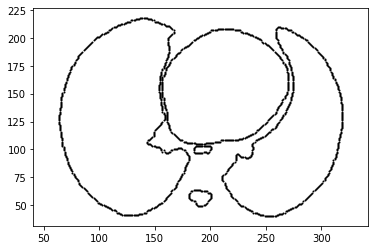

In [26]:
xy = getXYofboundary(im)
plt.scatter(xy[:,1],256-xy[:,0],  s=1, c='black')
plt.axis('equal')

(73.35, 285.65, 32.55, 218.45)

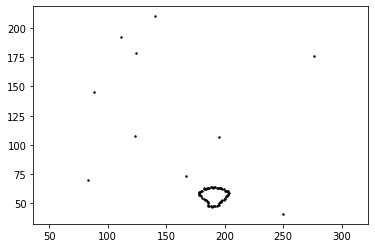

In [5]:
fig, ax = plt.subplots()
    
contour = []
with open('CT_18361990298_Image_57/spine/30.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        r=[]
        r.append(int(row[0]))
        r.append(int(row[1]))
        contour.append(r)
cont = np.array(contour)   
plt.scatter(cont[:,0],cont[:,1],  s=2, c='black')
plt.axis('equal')

In [6]:
im = cv2.imread('../dataset/goldMulty/CT_31973037250_Image_58.png',cv2.IMREAD_GRAYSCALE)

In [17]:
with open('../dataset/goldMulty/projections/CT_18361990298_Image_57.json') as f:
    gold_dict = json.load(f) 

In [42]:
gold_dict['eso-1']

[330.0,
 329.0,
 325.0,
 324.0,
 323.0,
 322.0,
 321.0,
 320.0,
 319.0,
 318.0,
 331.0,
 328.0,
 327.0,
 326.0,
 317.0,
 332.0,
 318.0,
 333.0,
 318.0,
 333.0,
 318.0,
 334.0,
 319.0,
 333.0,
 332.0,
 331.0,
 330.0,
 329.0,
 328.0,
 327.0,
 326.0,
 325.0,
 324.0,
 323.0,
 322.0,
 322.0,
 321.0]

In [43]:
lengths1

array([232., 231., 227., 226., 225., 224., 223., 222., 221., 220., 233.,
       230., 229., 228., 219., 234., 220., 235., 220., 236., 220., 236.,
       222., 235., 234., 233., 232., 231., 230., 230., 229., 228., 227.,
       226., 225., 224., 223.])

In [44]:
np.setdiff1d(numbers_dict['eso-80-1'],gold_dict['eso-1']).shape[0]

26